# TME 4 - Bandits (UCB, linUCB)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import données

In [2]:
dataFile = open('CTR.txt','r')
data = np.zeros((5000,16))
j=0
for l in dataFile.readlines():
    data[j][0] = l.split(":")[0]
    
    for i in range(1,6):
        data[j][i] = l.split(":")[1].split(';')[i-1]
    for i in range(6,16):
        data[j][i] = l.split(":")[2].split(';')[i-6]
    j+=1

In [3]:
data[:,0].shape

(5000,)

# UCB & linUCB

In [53]:
class ucb():

    def __init__(self,data):
        
        self.compteur = np.zeros(10)
        self.compteurCumule = np.zeros(10)
        self.reward = []
        self.random= []
        self.optimal = []
        self.best = []
        self.best.append(0)
        self.reward.append(0)
        self.optimal.append(0)
        self.random.append(0)
        self.mu = np.zeros(10)
        self.ite = 0
        for d in data:
            self.compteurCumule += d[6:]
        self.Bt = np.argmax(self.compteurCumule)
        
  
    def predict(self,line):
        Bt = np.zeros(10)
        c = 0
        if self.ite < 10:
            c = self.ite
        else:
            for b in range(len(Bt)):
                Bt[b] = (self.mu[b]/self.compteur[b])+np.sqrt( 2*np.log(self.ite)*1./self.compteur[b])
            c = np.argmax(Bt)
        
        self.mu[c]+=line[6+c]   
        
        self.reward.append(self.reward[-1]+line[6+c])
        self.best.append(self.best[-1]+ line[6+self.Bt])
        self.random.append(self.random[-1]+ line[6+np.random.randint(0,10)])
        self.optimal.append(self.optimal[-1]+ line[6+np.argmax(line[6:])])
        
        self.ite += 1
        self.compteur[c] += 1
        
class linUcb():

    def __init__(self,dim=10,d_dim = 5,alpha = .1):
        self.alpha = alpha
        self.d_dim = 5
        self.ite = 0
        self.dim = 10
        self.compteur = np.zeros(self.dim)
        self.reward = []
        self.reward.append(0)
        self.A = []
        self.b = []
        self.theta = []
        self.p = np.zeros(10)
        for i in range(10):
            self.A.append(np.identity(self.d_dim))
            self.b.append(np.zeros(self.d_dim))
            self.theta.append(np.zeros((5,5)))
            
            
    def predict(self,line):
        c = 0
        x = line[1:6]
        if self.ite < 10:
            c = self.ite
            
        else :
            for i in range(self.dim):
                self.theta[i] = np.linalg.inv(self.A[c]).dot(self.b[i])
                self.p[i] = self.theta[i].T.dot(x) + self.alpha * np.sqrt(x.T.dot(np.linalg.inv(self.A[i]).dot(x)))
            c = np.argmax(self.p)
        
        
        self.A[c]+=x.dot(x.T)
        self.b[c]+=line[c+6]*x
        
        self.reward.append(self.reward[-1]+line[6+c])
        self.ite += 1

## Expérimentations

In [54]:
t = ucb(data)
for d in data:
    t.predict(d)
l = linUcb()
for d in data:
    l.predict(d)

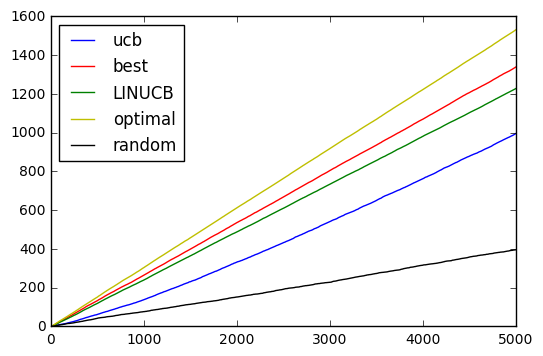

19.9287995362 % de chance de se faire visiter en moyenne


In [56]:
plt.plot(t.reward,label = "ucb",color="b")

plt.plot(t.best, label = "best",color="r")
plt.plot(l.reward, label = "LINUCB",color="g")

plt.plot(t.optimal, label = "optimal", color="y")
plt.plot(t.random, label = "random", color="black")
plt.legend(loc=2)
plt.show()

print t.reward[-1]/50,'% de chance de se faire visiter en moyenne'

In [10]:
print 'reward cumulé UCB : ', t.reward[-1]
print 'reward cumulé linUCB : ', l.reward[-1]
print 'reward cumulé optimal : ', t.optimal[-1]
print 'reward cumulé best : ', t.best[-1]
print 'reward cumulé random : ', t.random[-1]

reward cumulé UCB :  996.439976812
reward cumulé linUCB :  385.808060354
reward cumulé optimal :  1532.00323574
reward cumulé best :  1339.63503105
reward cumulé random :  406.114331721
